In [100]:
#create a function
#draw samples from it
#add noise to it to make it look real

In [101]:
#problem 1 - too many unknown variables
#solution - use last years data to map, once you have your equation - sample

In [102]:
import pandas as pd
df = pd.read_csv("data.csv")

In [103]:
df

,Voltage (V),Current(mA)
0,2.841,0.000
1,2.720,-2.315
2,2.699,-2.580
3,2.690,-2.765
4,2.646,-2.984
5,2.615,-3.145
6,2.580,-3.553
7,2.481,-3.829
8,2.442,-4.002
9,2.388,-4.138


In [104]:
import matplotlib.pyplot as plt

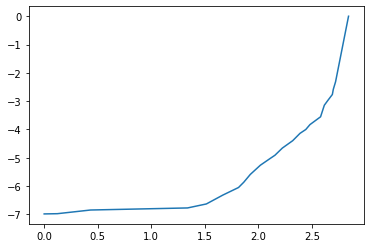

In [105]:
plt.plot(df["Voltage (V)"],df["Current(mA)"])

In [106]:
from lmfit.models import LorentzianModel
model = LorentzianModel()
#Levenberg-Marquard technique ---for future refrence

In [107]:
params = model.guess(df["Current(mA)"], x=df['Voltage (V)'])
result = model.fit(df["Current(mA)"], params, x=df['Voltage (V)'])
print(result.fit_report())

[[Model]]
    Model(lorentzian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 59
    # data points      = 24
    # variables        = 3
    chi-square         = 12.1334178
    reduced chi-square = 0.57778180
    Akaike info crit   = -10.3701692
    Bayesian info crit = -6.83600769
[[Variables]]
    amplitude: -37.4471586 +/- 2.54262304 (6.79%) (init = 2.959894)
    center:     0.83125475 +/- 0.08052512 (9.69%) (init = 2.701833)
    sigma:      1.43254118 +/- 0.15781645 (11.02%) (init = 0.113)
    fwhm:       2.86508236 +/- 0.31563291 (11.02%) == '2.0000000*sigma'
    height:    -8.32073901 +/- 0.55730703 (6.70%) == '0.3183099*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma)  = -0.820
    C(amplitude, center) = 0.761
    C(center, sigma)     = -0.601


<AxesSubplot:title={'center':'Model(lorentzian)'}, xlabel='x', ylabel='y'>

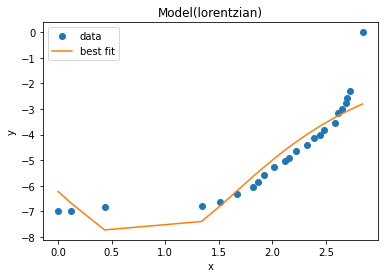

In [108]:
result.plot_fit()

In [109]:
import numpy as np
randomlist = np.random.uniform(0, 2.841,[18,1])
print(randomlist)

[[1.7059208 ]
 [2.11493348]
 [1.51344364]
 [1.05997979]
 [0.32076317]
 [1.48748838]
 [2.09822753]
 [1.24137728]
 [0.01579067]
 [2.54185367]
 [2.00291198]
 [0.90831812]
 [2.06907546]
 [1.12567545]
 [0.10263554]
 [0.62351403]
 [1.5361001 ]
 [2.04352953]]


In [110]:
import numpy
randomlist = numpy.append(randomlist,0.0)
randomlist = numpy.append(randomlist,2.841)

print(randomlist)

[1.7059208  2.11493348 1.51344364 1.05997979 0.32076317 1.48748838
 2.09822753 1.24137728 0.01579067 2.54185367 2.00291198 0.90831812
 2.06907546 1.12567545 0.10263554 0.62351403 1.5361001  2.04352953
 0.         2.841     ]


In [111]:
a = result.eval(x=randomlist)

In [112]:
a.dtype

dtype('float64')

In [113]:
a

array([-6.06116532, -4.61502188, -6.78261218, -8.11389481, -7.38316479,
       -6.87751321, -4.66878993, -7.69041607, -6.28436723, -3.42999156,
       -4.98564389, -8.29672884, -4.76390126, -7.98351605, -6.61061078,
       -8.14936163, -6.69899231, -4.8485664 , -6.22479682, -2.80330062])

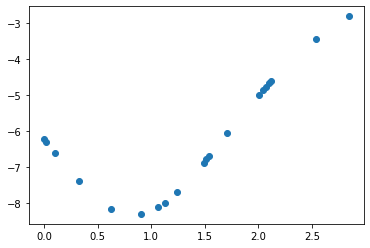

In [114]:
plt.scatter(randomlist,a)

In [115]:
y = randomlist*a

In [116]:
y

array([-10.339868  ,  -9.76046427, -10.2651013 ,  -8.60056455,
        -2.36824734, -10.23022101,  -9.79618355,  -9.54670779,
        -0.09923436,  -8.71853662,  -9.98580587,  -7.53606916,
        -9.8568712 ,  -8.98684806,  -0.67848361,  -5.08124133,
       -10.29032275,  -9.90818865,  -0.        ,  -7.96417706])

In [117]:
y.min()

-10.339867996598654

In [118]:
randomlist.max()

2.841

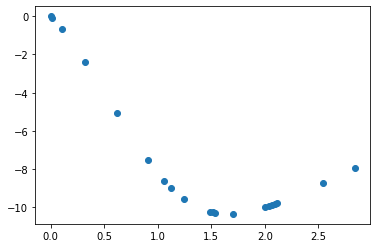

In [119]:
plt.scatter(randomlist,y)

In [120]:
data = {'V':randomlist,
        'I':a,
        'power':y}

In [121]:
df = pd.DataFrame(data)

In [122]:
df

,V,I,power
0,1.705921,-6.061165,-10.339868
1,2.114933,-4.615022,-9.760464
2,1.513444,-6.782612,-10.265101
3,1.059980,-8.113895,-8.600565
4,0.320763,-7.383165,-2.368247
5,1.487488,-6.877513,-10.230221
6,2.098228,-4.668790,-9.796184
7,1.241377,-7.690416,-9.546708
8,0.015791,-6.284367,-0.099234
9,2.541854,-3.429992,-8.718537


In [127]:
Isc = -6.22479682
Voc = 2.841
Im = -6.061165
Vm = 1.705921

In [128]:
ff = (Im*Vm)/(Isc*Voc)

In [129]:
print(ff)

0.5846804977403235
